In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


import matplotlib.pyplot as plt
import tensorflow as tf

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [13]:

# Load the data from the CSV file
aranet4 = pd.read_csv('../datasets/aranet4.csv')
aranetExp = pd.read_csv('../datasets/aranetExp.csv')

# Convert the date column to datetime
aranetExp['date'] = pd.to_datetime(aranetExp['date'])
aranetExp = aranetExp.rename(columns={'date': 'Datetime'})
aranetExp = aranetExp.drop(columns=['id','time'])
aranetExp = aranetExp.set_index('Datetime')

# Convert the date column to datetime 
aranet4['Datetime'] = pd.to_datetime(aranet4['Datetime'])
aranet4 = aranet4.set_index('Datetime')

# Create a copy of aranetExp
aranetExp_copy = aranetExp.copy()

# Round the 'Datetime' index to the nearest minute
aranetExp_copy.index = aranetExp_copy.index.round('min')
# Ensure each record has a unique datetime to the minute
unique_minutes = set()
for i in range(len(aranetExp_copy)):
    current_time = aranetExp_copy.index[i]
    original_time = current_time
    while current_time in unique_minutes:
        print(f"Changing {current_time} to ", end="")
        current_time += pd.Timedelta(minutes=1)
        print(f"{current_time}")
    if current_time != original_time:
        print(f"Original time {original_time} changed to {current_time}")
    unique_minutes.add(current_time)
    aranetExp_copy.index.values[i] = current_time
    
def custom_round_to_nearest_minute(dt_index):
    rounded_index = dt_index.floor('min') + pd.to_timedelta((dt_index.second >= 30).astype(int), unit='min')
    rounded_index.name = dt_index.name  # Preserve the name of the index
    return rounded_index

# Create a copy of aranet4
aranet4_copy = aranet4.copy()

# Use the custom function to round the 'Datetime' index to the nearest minute
aranet4_copy.index = custom_round_to_nearest_minute(aranet4_copy.index)

# Merge aranet4_copy with aranetExp_copy using an exact match on the 'Datetime' index
merged = pd.merge(aranet4_copy, aranetExp_copy, left_on='Datetime', right_index=True, how='left')


aranet_tf = merged.copy()
aranet_tf['hour'] = aranet_tf.index.hour
aranet_tf['minute'] = aranet_tf.index.minute


aranet = aranet_tf.copy()

# Filter the DataFrame to include all records from "2024-03-14 00:00:00" onwards
aranet_filtered = aranet.loc["2024-03-14 00:00:00":]


# Define a function to label the time periods as a boolean
def label_song_lec(row):
    if row.name.dayofweek in [0, 1, 2, 3]:  # Monday to Thursday
        if row.name.time() >= pd.to_datetime('12:15').time() and row.name.time() <= pd.to_datetime('13:30').time():
            return True
    return False

# Apply the function to the DataFrame
aranet_filtered['song_lec'] = aranet_filtered.apply(label_song_lec, axis=1)

def label_chen_lec(row):
    if row.name.dayofweek in [0, 2]:  # Monday and Wednesday
        if row.name.time() >= pd.to_datetime('09:00').time() and row.name.time() <= pd.to_datetime('10:15').time():
            return True
    elif row.name.dayofweek in [1, 3]:  # Tuesday and Thursday
        if row.name.time() >= pd.to_datetime('08:00').time() and row.name.time() <= pd.to_datetime('09:15').time():
            return True
    return False

aranet_filtered['chen_lec'] = aranet_filtered.apply(label_chen_lec, axis=1)

filtered_lec_df = aranet_filtered[(aranet_filtered['song_lec'] == True) | (aranet_filtered['chen_lec'] == True)]

filtered_lec_df.info()

Changing 2024-03-13 13:08:00 to 2024-03-13 13:09:00
Original time 2024-03-13 13:08:00 changed to 2024-03-13 13:09:00
Changing 2024-03-18 12:25:00 to 2024-03-18 12:26:00
Original time 2024-03-18 12:25:00 changed to 2024-03-18 12:26:00
Changing 2024-03-18 12:26:00 to 2024-03-18 12:27:00
Original time 2024-03-18 12:26:00 changed to 2024-03-18 12:27:00
Changing 2024-03-19 09:18:00 to 2024-03-19 09:19:00
Original time 2024-03-19 09:18:00 changed to 2024-03-19 09:19:00
Changing 2024-03-25 10:18:00 to 2024-03-25 10:19:00
Original time 2024-03-25 10:18:00 changed to 2024-03-25 10:19:00
Changing 2024-04-02 12:34:00 to 2024-04-02 12:35:00
Original time 2024-04-02 12:34:00 changed to 2024-04-02 12:35:00
Changing 2024-04-04 12:30:00 to 2024-04-04 12:31:00
Original time 2024-04-04 12:30:00 changed to 2024-04-04 12:31:00
Changing 2024-04-08 12:31:00 to 2024-04-08 12:32:00
Original time 2024-04-08 12:31:00 changed to 2024-04-08 12:32:00
Changing 2024-04-08 12:32:00 to 2024-04-08 12:33:00
Original tim

C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_62200\1943374909.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aranet_filtered['song_lec'] = aranet_filtered.apply(label_song_lec, axis=1)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2126 entries, 2024-03-14 08:00:00 to 2024-04-08 13:30:00
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Carbon dioxide(ppm)        2126 non-null   int64  
 1   Temperature(°F)            2126 non-null   float64
 2   Relative humidity(%)       2126 non-null   float64
 3   Atmospheric pressure(hPa)  2126 non-null   float64
 4   door1                      160 non-null    object 
 5   door2                      160 non-null    object 
 6   hvac                       160 non-null    object 
 7   subject_count              160 non-null    float64
 8   hour                       2126 non-null   int64  
 9   minute                     2126 non-null   int64  
 10  song_lec                   2126 non-null   bool   
 11  chen_lec                   2126 non-null   bool   
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 186.9+ KB


C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_62200\1943374909.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aranet_filtered['chen_lec'] = aranet_filtered.apply(label_chen_lec, axis=1)


In [14]:

# Initialize variables
sliced_dataframes = {}
lecture_start_time = None
lecture_type = None
lecture_count = {'song': 0, 'chen': 0}

# Iterate through the DataFrame
for index, row in filtered_lec_df.iterrows():
    # Check if we are in a new lecture
    if lecture_start_time is None or (index - lecture_start_time).total_seconds() > 75 * 60 or (row['song_lec'] and lecture_type != 'song') or (row['chen_lec'] and lecture_type != 'chen'):
        # Store the previous lecture if it exists
        if lecture_start_time is not None:
            lecture_label = f"{lecture_type}_lec_{lecture_count[lecture_type]}"
            # Subtract one minute from the end index of the slice
            sliced_dataframes[lecture_label] = filtered_lec_df.loc[lecture_start_time:index - pd.Timedelta(minutes=1)]
        
        # Update the lecture start time and type
        lecture_start_time = index
        if row['song_lec']:
            lecture_type = 'song'
        elif row['chen_lec']:
            lecture_type = 'chen'
        lecture_count[lecture_type] += 1

# Store the last lecture
if lecture_start_time is not None:
    lecture_label = f"{lecture_type}_lec_{lecture_count[lecture_type]}"
    # Subtract one minute from the end index of the last slice
    sliced_dataframes[lecture_label] = filtered_lec_df.loc[lecture_start_time:index - pd.Timedelta(minutes=1)]

# Display the keys of the sliced dataframes
print(sliced_dataframes.keys())


# Impute missing values in each lecture slice
# Iterate over each key (lecture) in the dictionary
for lecture_key in sliced_dataframes.keys():
    # Forward fill to impute missing values
    sliced_dataframes[lecture_key] = sliced_dataframes[lecture_key].ffill()

    # Backward fill to impute remaining missing values
    sliced_dataframes[lecture_key] = sliced_dataframes[lecture_key].bfill()



# Check if any column in the DataFrame has 0 non-null values

# Copy the keys to a list to avoid RuntimeError for changing dict size during iteration
keys_to_check = list(sliced_dataframes.keys())

# Store the lectures that will be removed
removed_lectures = []

for lecture_key in keys_to_check:
    # Check if any column in the DataFrame has 0 non-null values
    if (sliced_dataframes[lecture_key].count() == 0).any():
        # If found, add to the list of lectures to remove and delete from dictionary
        removed_lectures.append(lecture_key)
        del sliced_dataframes[lecture_key]

# Print the lectures that were removed
print("Lectures removed due to 0 non-null counts in all columns:", removed_lectures)

# Define a function to fill missing minutes in the DataFrame
def fill_missing_minutes_in_lectures(sliced_dataframes):
    for lecture_key, df in sliced_dataframes.items():
        # Get the minute column as a Series
        minutes = df.index.minute
        
        # Find the difference between consecutive minutes
        minute_diffs = minutes.to_series().diff().fillna(1)  # Fill the first NaN with 1
        
        # Identify indices where the difference is greater than 1
        missing_minute_indices = minute_diffs[minute_diffs > 1].index
        
        # For each missing minute, add a new row with NaN values
        for idx in missing_minute_indices:
            missing_time = df.index[idx - 1] + pd.Timedelta(minutes=1)
            empty_row = pd.DataFrame({col: np.nan for col in df.columns}, index=[missing_time])
            df = pd.concat([df, empty_row])
            print(f"Empty record created for {lecture_key} at {missing_time}")
        
        # Sort the DataFrame after adding new rows to maintain chronological order
        sliced_dataframes[lecture_key] = df.sort_index()
        
    return sliced_dataframes

# Apply the function
sliced_dataframes = fill_missing_minutes_in_lectures(sliced_dataframes)

def ensure_song_lecture_endpoints(sliced_dataframes):
    for lecture_key, df in sliced_dataframes.items():
        if 'song_lec' in lecture_key:
            # Check if the start and end points are missing
            start_time = df.index.min().replace(hour=12, minute=15, second=0)
            end_time = df.index.max().replace(hour=13, minute=30, second=0)

            if df.index.min() != start_time:
                # Add a new row at the start time with NaN values
                df.loc[start_time] = [np.nan] * len(df.columns)
                print(f"Start record created for {lecture_key} at {start_time}")

            if df.index.max() != end_time:
                # Add a new row at the end time with NaN values
                df.loc[end_time] = [np.nan] * len(df.columns)
                print(f"End record created for {lecture_key} at {end_time}")

            # Sort the DataFrame after adding new rows to maintain chronological order
            sliced_dataframes[lecture_key] = df.sort_index()

    return sliced_dataframes

# Apply the function
sliced_dataframes = ensure_song_lecture_endpoints(sliced_dataframes)

# Impute missing values in each lecture slice
# Iterate over each key (lecture) in the dictionary
for lecture_key in sliced_dataframes.keys():
    # Forward fill to impute missing values
    sliced_dataframes[lecture_key] = sliced_dataframes[lecture_key].ffill()

    # Backward fill to impute remaining missing values
    sliced_dataframes[lecture_key] = sliced_dataframes[lecture_key].bfill()

dict_keys(['chen_lec_1', 'song_lec_1', 'chen_lec_2', 'song_lec_2', 'chen_lec_3', 'song_lec_3', 'chen_lec_4', 'song_lec_4', 'chen_lec_5', 'song_lec_5', 'chen_lec_6', 'song_lec_6', 'chen_lec_7', 'song_lec_7', 'chen_lec_8', 'song_lec_8', 'chen_lec_9', 'song_lec_9', 'chen_lec_10', 'song_lec_10', 'chen_lec_11', 'song_lec_11', 'chen_lec_12', 'song_lec_12', 'chen_lec_13', 'song_lec_13', 'chen_lec_14', 'song_lec_14'])
Lectures removed due to 0 non-null counts in all columns: ['chen_lec_5', 'song_lec_5', 'chen_lec_8', 'song_lec_8', 'chen_lec_9', 'song_lec_9', 'song_lec_10', 'chen_lec_11']
Empty record created for chen_lec_7 at 2024-03-26 08:45:00
End record created for song_lec_14 at 2024-04-08 13:30:00


C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_62200\2556405318.py:80: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df = pd.concat([df, empty_row])
C:\Users\Corey Dearing\AppData\Local\Temp\ipykernel_62200\2556405318.py:105: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df.loc[end_time] = [np.nan] * len(df.columns)


In [8]:
# Print the length of the flattened arrays for each lecture
for lecture_key, df in sliced_dataframes.items():
    print(f"{lecture_key}: {len(df.values.flatten())}")

chen_lec_1: 912
song_lec_1: 912
chen_lec_2: 912
song_lec_2: 912
chen_lec_3: 912
song_lec_3: 912
chen_lec_4: 912
song_lec_4: 912
chen_lec_6: 912
song_lec_6: 912
chen_lec_7: 912
song_lec_7: 912
chen_lec_10: 912
song_lec_11: 912
chen_lec_12: 912
song_lec_12: 912
chen_lec_13: 912
song_lec_13: 912
chen_lec_14: 912
song_lec_14: 912


In [48]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Copy sliced_dataframes by subsetting the columns
model_set = {key: df[['Carbon dioxide(ppm)', 'door1', 'door2', 'hvac']].copy() for key, df in sliced_dataframes.items()}

# 2. Normalize 'Carbon dioxide(ppm)' and encode 'door1', 'door2', and 'hvac'
scaler = MinMaxScaler()

for key, df in model_set.items():
    # Normalize 'Carbon dioxide(ppm)'
    # Calculate the one-minute difference ('diff') and one-minute lag ('lag') for 'Carbon dioxide(ppm)'
    df['diff'] = df['Carbon dioxide(ppm)'].diff()
    df['diff'] = scaler.fit_transform(df[['diff']])
    df['Carbon dioxide(ppm)'] = scaler.fit_transform(df[['Carbon dioxide(ppm)']])

    # Encode 'door1', 'door2', and 'hvac'
    df['door1'] = df['door1'].map({'open': 1, 'closed': 0})
    df['door2'] = df['door2'].map({'open': 1, 'closed': 0})
    df['hvac'] = df['hvac'].map({'on': 1, 'off': 0})

    # Calculate the one-minute difference ('diff') and one-minute lag ('lag') for 'Carbon dioxide(ppm)'
    # df['diff'] = df['Carbon dioxide(ppm)'].diff()
    df['lag'] = df['Carbon dioxide(ppm)'].shift()

    # Drop NA values that result from diff and lag calculations
    df.dropna(inplace=True)
    # 1. Add 'lecturer' column based on the key

    if 'song' in key:
        df['lecturer'] = 'song'
    elif 'chen' in key:
        df['lecturer'] = 'chen'
    else:
        df['lecturer'] = 'other'  # or any default value you prefer
        

# Check the data types and shapes after normalization, encoding, and feature creation
    print(f"{key}: {df.shape}")
    print(df.dtypes)


chen_lec_1: (75, 7)
Carbon dioxide(ppm)    float64
door1                    int64
door2                    int64
hvac                     int64
diff                   float64
lag                    float64
lecturer                object
dtype: object
song_lec_1: (75, 7)
Carbon dioxide(ppm)    float64
door1                    int64
door2                    int64
hvac                     int64
diff                   float64
lag                    float64
lecturer                object
dtype: object
chen_lec_2: (75, 7)
Carbon dioxide(ppm)    float64
door1                    int64
door2                    int64
hvac                     int64
diff                   float64
lag                    float64
lecturer                object
dtype: object
song_lec_2: (75, 7)
Carbon dioxide(ppm)    float64
door1                    int64
door2                    int64
hvac                     int64
diff                   float64
lag                    float64
lecturer                object
dtype: obj

## Train-Test-Split Lectures

In [54]:
from sklearn.model_selection import train_test_split

# Set a seed for reproducibility
np.random.seed(42)

# Get a list of all lecture keys
lecture_keys = list(model_set.keys())

# Randomly split the lecture keys into training, validation, and test sets
train_keys, test_keys = train_test_split(lecture_keys, test_size=0.25)  # Split into train and test first
train_keys, val_keys = train_test_split(train_keys, test_size=0.2)  # Split train into train and validation

# Create dictionaries to hold the training, validation, and test frames
train_frames = {key: model_set[key] for key in train_keys}
val_frames = {key: model_set[key] for key in val_keys}
test_frames = {key: model_set[key] for key in test_keys}

# Print out the keys for each set to verify the split
print("Training keys:", train_keys)
print("Validation keys:", val_keys)
print("Test keys:", test_keys)

Training keys: ['chen_lec_14', 'chen_lec_4', 'chen_lec_2', 'song_lec_2', 'chen_lec_12', 'song_lec_14', 'song_lec_11', 'chen_lec_3', 'song_lec_3', 'chen_lec_13', 'song_lec_4', 'song_lec_7']
Validation keys: ['song_lec_6', 'chen_lec_7', 'chen_lec_10']
Test keys: ['chen_lec_1', 'song_lec_13', 'song_lec_12', 'song_lec_1', 'chen_lec_6']


In [64]:

# 2. Concatenate all the dataframes vertically
co2_model_tr = pd.concat(train_frames.values(), ignore_index=True)
co2_model_val = pd.concat(val_frames.values(), ignore_index=True)
co2_model_te = pd.concat(test_frames.values(), ignore_index=True)
# Check the concatenated dataframe
print(co2_model_tr.head())


   Carbon dioxide(ppm)  door1  door2  hvac      diff       lag lecturer
0             0.094737      1      0     0  0.451220  0.000000     chen
1             0.000000      1      0     0  0.231707  0.094737     chen
2             0.136842      1      0     0  0.500000  0.000000     chen
3             0.315789      1      0     0  0.548780  0.136842     chen
4             0.426316      1      0     1  0.469512  0.315789     chen


dummy encode `chen = 0` and `song = 1`

In [65]:
# Dummy encode the 'lecturer' column
co2_model_tr = pd.get_dummies(co2_model_tr, columns=['lecturer'], drop_first=True)
co2_model_val = pd.get_dummies(co2_model_val, columns=['lecturer'], drop_first=True)
co2_model_te = pd.get_dummies(co2_model_te, columns=['lecturer'], drop_first=True)
# Rename the dummy column for clarity
co2_model_tr.rename(columns={'lecturer_song': 'lecturer', 'Carbon dioxide(ppm)': 'co2'}, inplace=True)
co2_model_val.rename(columns={'lecturer_song': 'lecturer', 'Carbon dioxide(ppm)': 'co2'}, inplace=True)
co2_model_te.rename(columns={'lecturer_song': 'lecturer', 'Carbon dioxide(ppm)': 'co2'}, inplace=True)
# Check the updated dataframe
print(co2_model_tr.head())


        co2  door1  door2  hvac      diff       lag  lecturer
0  0.094737      1      0     0  0.451220  0.000000         0
1  0.000000      1      0     0  0.231707  0.094737         0
2  0.136842      1      0     0  0.500000  0.000000         0
3  0.315789      1      0     0  0.548780  0.136842         0
4  0.426316      1      0     1  0.469512  0.315789         0


In [58]:
len(model_set) * len(model_set['song_lec_1'])

1500

In [68]:
co2_model_tr.shape, co2_model_val.shape, co2_model_te.shape

((900, 7), (225, 7), (375, 7))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

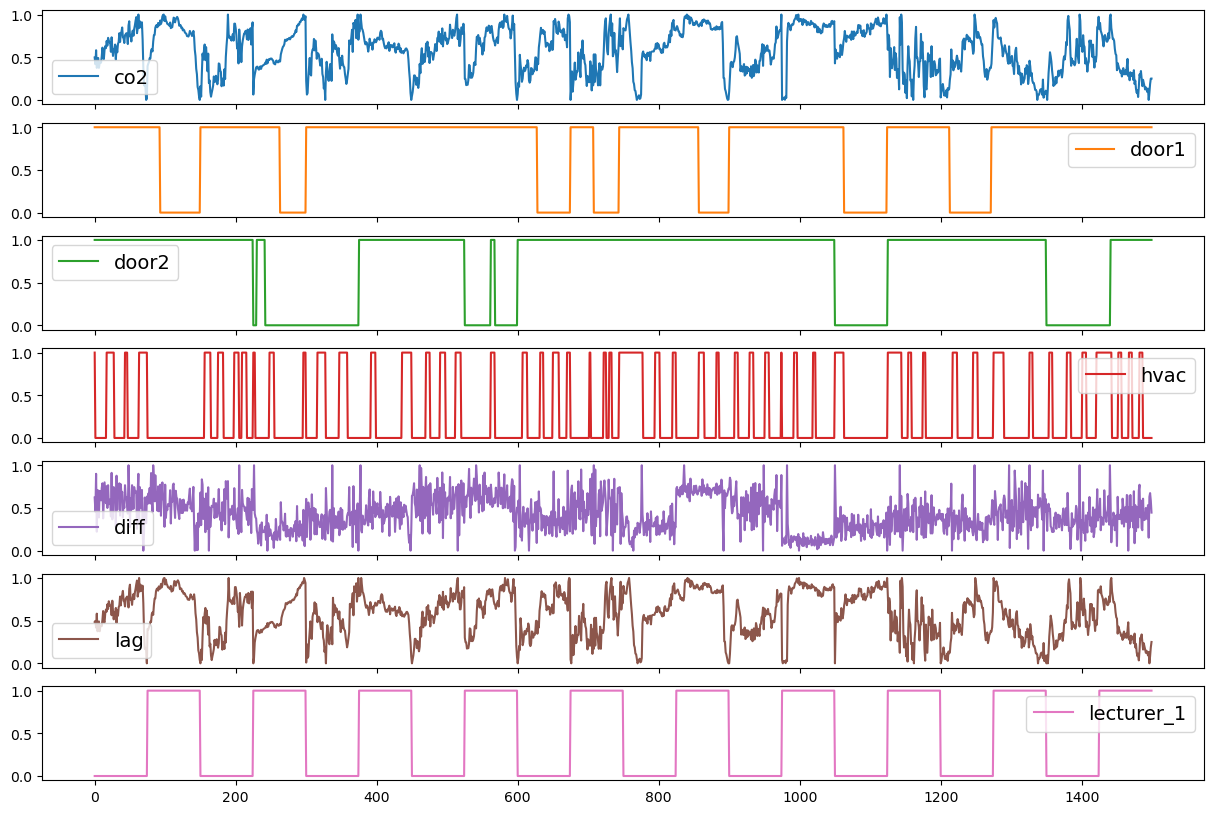

In [61]:
co2_model.plot(subplots=True, figsize=(15, 10))

Now that all our dataframes are stacked, let's try tensorflows window class

In [69]:
train_df = co2_model_tr.copy()
val_df = co2_model_val.copy()
test_df = co2_model_te.copy()

In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   co2       900 non-null    float64
 1   door1     900 non-null    int64  
 2   door2     900 non-null    int64  
 3   hvac      900 non-null    int64  
 4   diff      900 non-null    float64
 5   lag       900 non-null    float64
 6   lecturer  900 non-null    uint8  
dtypes: float64(3), int64(3), uint8(1)
memory usage: 43.2 KB
